In [5]:
import sys

import numpy as np
import pandas as pd
import s3fs
import seaborn as sns

sys.path.append("/Users/fgu/dev/projects/entropy")
import entropy.data.aggregators as agg
import entropy.data.cleaners as cl
import entropy.data.make_data as md
import entropy.data.selectors as sl
import entropy.data.validators as vl
import entropy.helpers.aws as ha
import entropy.helpers.data as hd
import entropy.helpers.helpers as hh

pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
pd.set_option("max_colwidth", None)
%load_ext autoreload
%autoreload 2

fs = s3fs.S3FileSystem(profile="3di")

In [7]:
dft = hd.read_txn_data("777")
hd.inspect(dft)

Time for read_txn_data                 : 3.63 seconds
(649,820, 19)


,date,user_id,amount,desc,merchant,tag_group,tag,account_id,account_last_refreshed,account_provider,account_type,debit,desc_orig,female,id,latest_balance,postcode,tag_auto,yob
0,2012-02-01,777,400.00,mdbremoved,NaN,transfers,other_transfers,262916,2020-07-21 20:32:00,natwest bank,current,True,<mdbremoved> - s/o,0.0,688300,364.220001,wa1 4,transfers,1969.0
1,2012-02-01,777,3.03,aviva pa,aviva,spend,finance,262916,2020-07-21 20:32:00,natwest bank,current,True,aviva pa - d/d,0.0,688299,364.220001,wa1 4,health insurance,1969.0


<AxesSubplot:xlabel='ym'>

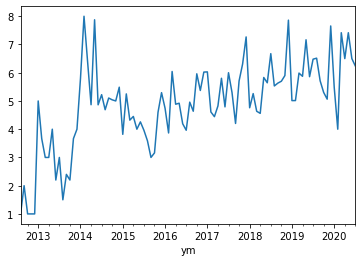

In [18]:
dft[dft.merchant.eq("amazon")].assign(ym=lambda df: df.date.dt.to_period("m")).groupby('ym').agg(users=('user_id', 'nunique'), txns=('amount', 'count')).assign(txns_per_user=lambda df: df.txns / df.users).txns_per_user.plot()